<a id="toc"></a>
# barc4sr: 
## Example 04 - Undulator wavefront

[rafael.celestre@synchrotron-soleil.fr](mailto:rafael.celestre@synchrotron-soleil.fr)

<hr style="border:1px solid orange">

In [1]:
__author__ = ['Rafael Celestre']
__contact__ = 'rafael.celestre@synchrotron-soleil.fr'
__license__ = 'GPL-3.0'
__copyright__ = 'Synchrotron SOLEIL, Saint Aubin, France'
__created__ = '18/JUN/2024'
__changed__ = '19/JUN/2024'


import sys

import barc4sr.sr_undulator as und
import numpy as np
from barc4plots.barc4plots import PlotManager
from barc4sr.aux_processing import read_wavefront
from barc4sr.aux_utils import (
                               ElectronBeam,
                               MagneticStructure,
                               SynchrotronSource,
)

# checking we are using the correct python:
print(sys.executable)
print(sys.version)

# # benchmarking tools
%load_ext autoreload
%autoreload 2
# %matplotlib widget


c:\Users\celestre\AppData\Local\miniconda3\envs\oasys\python.exe
3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]


### Creation of SYNED input file (.json)

[Back to the top](#toc)

The SYNED Light Source file containing the electron beam parameters and the undulator parameters
is necessary for using barc4sr. While the preferred method for generating it remains [OASYS](https://oasys-kit.github.io/), 
barc4sr provides its own functions methods.


In [2]:
straight_section = ElectronBeam()

straight_section.from_twiss(energy=2.75, energy_spread=0.001025, current=0.500,
                            emittance=3.939e-9, coupling=1/100,
                            emittance_x=None, emittance_y=None,
                            beta_x=4.789, beta_y=3.7497, 
                            alpha_x=-0.3858, alpha_y=-0.7746,
                            eta_x=0.1804, eta_y=0.0044,
                            etap_x=0.0007, etap_y=-0.0025)

u64 = MagneticStructure(K_vertical=0.0,
                        K_horizontal=0.0,
                        period_length=64e-3,
                        number_of_periods=28.0)

u64.set_resonant_energy(50, 1, straight_section.energy_in_GeV, "v")

hermes = SynchrotronSource(straight_section, u64)
hermes.write_syned_config(".\light_sources\soleil_hu64.json", "SOLEIL-HU64")

In [3]:
ei = 50
step = 5e-6
hor_slit=15e-3
hor_slit_n=int(hor_slit/step)+1
ver_slit=7.5e-3
ver_slit_n=int(ver_slit/step)+1

## Ideal undulator

This example show different ways or calling ```sr_undulator.emitted_wavefront(*args, **kwargs)```
for a filament beam 20m downstream the centre of the straight section.

[Back to the top](#toc)

### Filament beam (no emittance)

In [4]:
undulator_wavefront = und.emitted_wavefront(
                                            file_name=".\_results\SOLEIL-U64mm_filament_beam",
                                            json_file=".\light_sources\soleil_hu64.json",
                                            photon_energy=ei,
                                            hor_slit=hor_slit, 
                                            hor_slit_n=hor_slit_n,
                                            ver_slit=ver_slit,
                                            ver_slit_n=ver_slit_n,
                                            observation_point=20,
                                            Kv_symmetry=1,
                                            filament_beam=True,
                                            energy_spread=True)

Undulator spatial distribution for a given energy using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing monochromatic wavefront calculation (simplified partially-coherent simulation) ... completed
Undulator spatial distribution for a given energy using SRW: finished.
>> Total elapsed time: 32.55 s


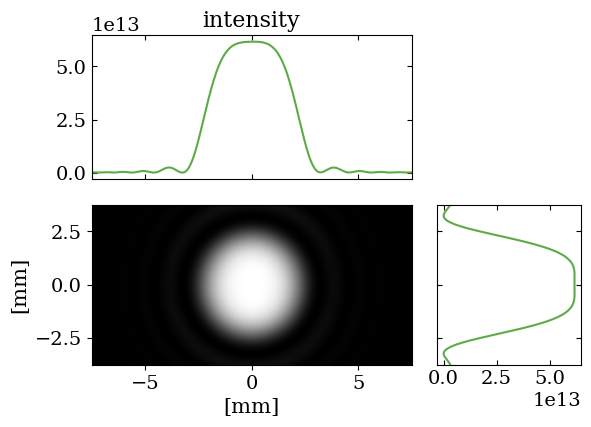

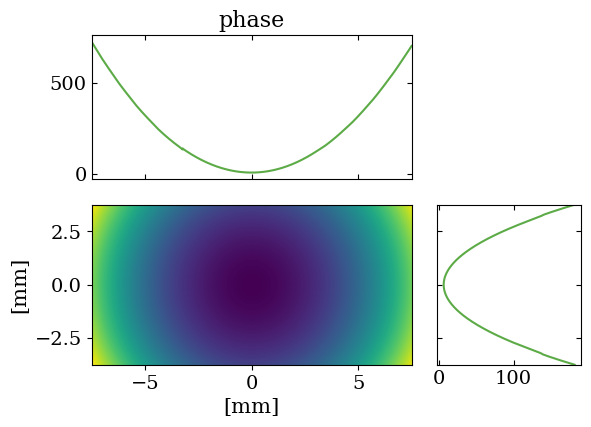

In [5]:
undulator_wavefront = read_wavefront(".\_results\SOLEIL-U64mm_filament_beam_undulator_wft.h5")

img = PlotManager(undulator_wavefront["wavefront"]["intensity"], undulator_wavefront["axis"]["x"], undulator_wavefront["axis"]["y"])
img.additional_info('intensity', '[mm]', '[mm]')
img.aesthetics(400, True, True, 0 , 1, False, 4).info_2d_plot(0, True, None).plot_2d_cuts()

img = PlotManager(undulator_wavefront["wavefront"]["phase"], undulator_wavefront["axis"]["x"], undulator_wavefront["axis"]["y"])
img.additional_info('phase', '[mm]', '[mm]')
img.aesthetics(400, True, True, 0 , 1, False, 4).info_2d_plot(2, True, None).plot_2d_cuts()

### Emittance effects (simplified calculation)

In [6]:
undulator_wavefront = und.emitted_wavefront(
                                            file_name=".\_results\SOLEIL-U64mm_emittance_a",
                                            json_file=".\light_sources\soleil_hu64.json",
                                            photon_energy=ei,
                                            hor_slit=hor_slit, 
                                            hor_slit_n=hor_slit_n,
                                            ver_slit=ver_slit,
                                            ver_slit_n=ver_slit_n,
                                            observation_point=20,
                                            Kv_symmetry=1,
                                            filament_beam=False,
                                            energy_spread=True)

Undulator spatial distribution for a given energy using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing monochromatic wavefront calculation (simplified partially-coherent simulation) ... completed
Undulator spatial distribution for a given energy using SRW: finished.
>> Total elapsed time: 32.29 s


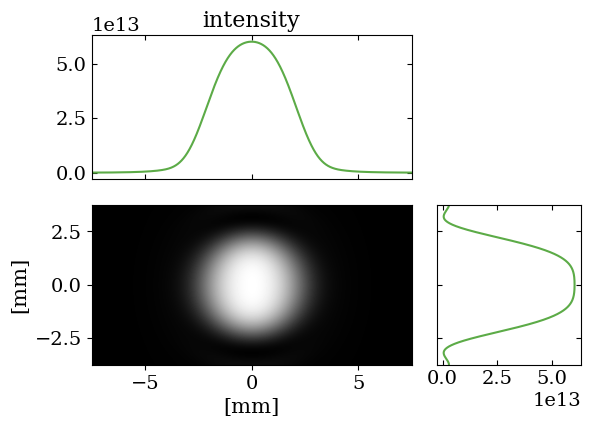

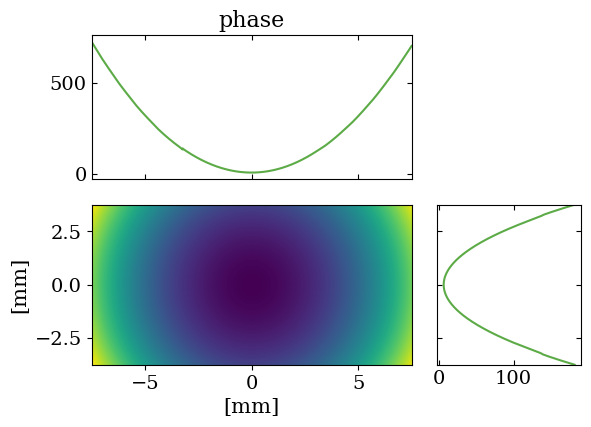

In [7]:
undulator_wavefront = read_wavefront(".\_results\SOLEIL-U64mm_emittance_a_undulator_wft.h5")

img = PlotManager(undulator_wavefront["wavefront"]["intensity"], undulator_wavefront["axis"]["x"], undulator_wavefront["axis"]["y"])
img.additional_info('intensity', '[mm]', '[mm]')
img.aesthetics(400, True, True, 0 , 1, False, 4).info_2d_plot(0, True, None).plot_2d_cuts()

img = PlotManager(undulator_wavefront["wavefront"]["phase"], undulator_wavefront["axis"]["x"], undulator_wavefront["axis"]["y"])
img.additional_info('phase', '[mm]', '[mm]')
img.aesthetics(400, True, True, 0 , 1, False, 4).info_2d_plot(2, True, None).plot_2d_cuts()